# Problem Statement

## Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('crime_data.csv')

In [3]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# EDA and Feature Engineering

In [4]:
df=df.rename({"Unnamed: 0":"Cities"},axis=1)

In [5]:
df

,Cities,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
df.isnull().sum()

Cities      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cities    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# Histogram

In [8]:
df1 = df.iloc[:,1:]

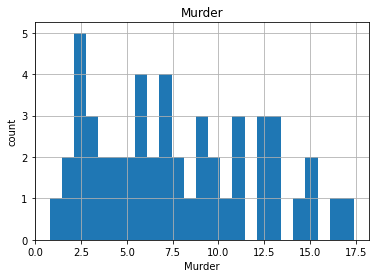

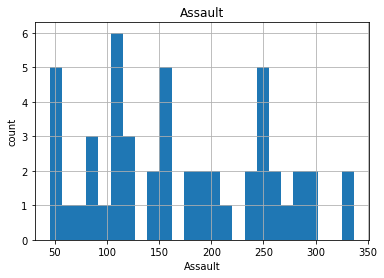

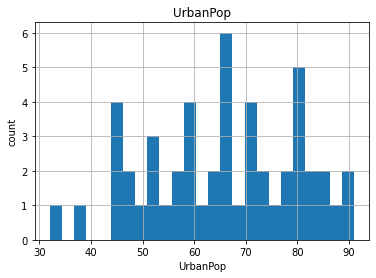

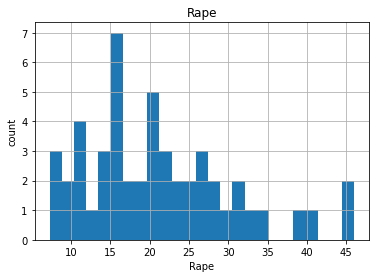

In [9]:
for feature in df1:
    data = df1.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

# Boxplot

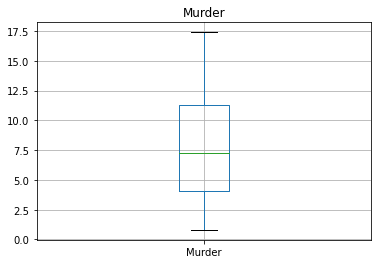

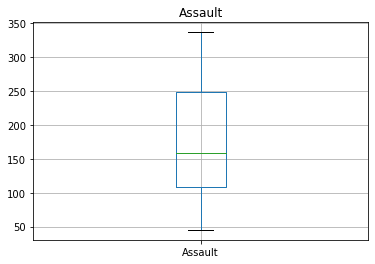

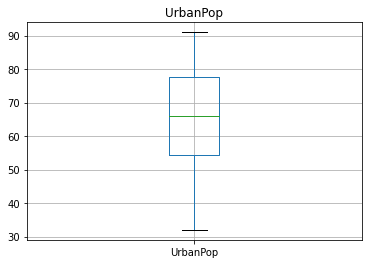

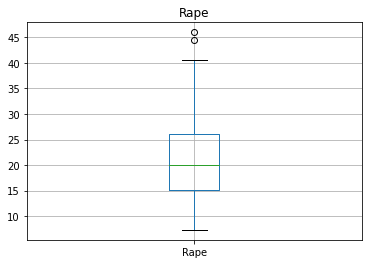

In [10]:
for feature in df1:
    data = df1.copy()
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

# Observation :
As we can see that in rape column we can see some outliers in it.

# Transformation of data into MinMax Scaler

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
min_max=MinMaxScaler()

In [13]:
df2 = min_max.fit_transform(df.iloc[:,1:])

In [14]:
df2

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [15]:
pd.DataFrame(data=df2,columns=["Murder","Assault","UrbanPop","Rape"])

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# Hierarchical Clustering

In [16]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster .hierarchy import linkage

# Dedrogram For Complete Linkage

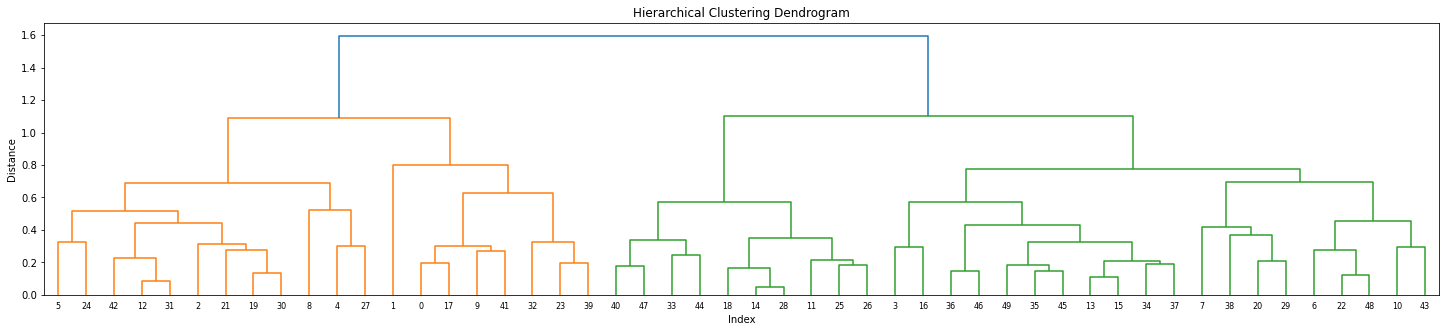

In [17]:
z = linkage(df2, method="complete",metric="euclidean")

plt.figure(figsize=(25, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0., 
    leaf_font_size=8., 
)
plt.show()

# Observation :
We can see that in complete linkage they are forming 2 clusters

# Dendrogram using Average Linkage

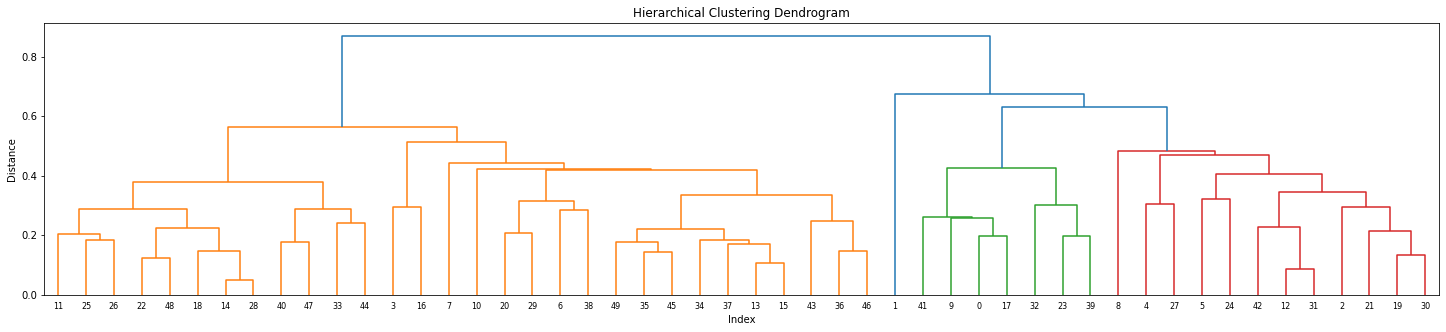

In [18]:
z1 = linkage(df2, method="average",metric="euclidean")

plt.figure(figsize=(25, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z1,
    leaf_rotation=0., 
    leaf_font_size=8., 
)
plt.show()

# Observation:
We can see that in average linkage they are forming 4 clusters

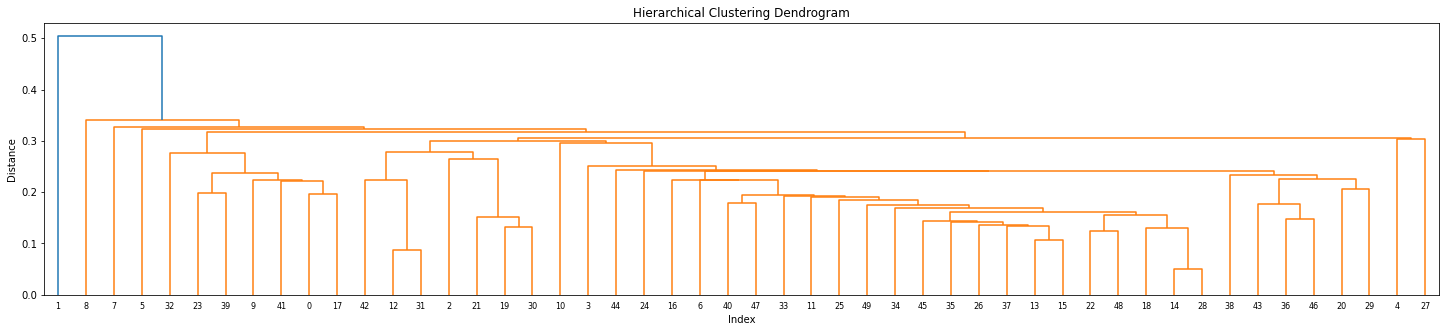

In [19]:
z2 = linkage(df2, method="single",metric="euclidean")

plt.figure(figsize=(25, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z2,
    leaf_rotation=0., 
    leaf_font_size=8., 
)
plt.show()

# Observation :
we can see that in single linkage they are forming only 2 clusters

# Validation of Hierarchical Cluster using Silhouette Score

In [20]:
from sklearn.metrics import silhouette_score as sil

In [21]:
n_clusters = [2,3,4,5,6,7,8]  

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)
        hie_labels1 = hie_cluster1.fit_predict(df2)
        silhouette_score1 = sil(df2, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958487

For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185444

For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3060729442426308
For n_clusters = 4 The average silhouette_score with linkage- average : 0.36992391140277175
For n_clusters = 4 The average silhouette_score with linkage- single : -0.1674119195474404

For n_clusters = 5 The average silhouette_score with linkage- complete : 0.3056360903608855
For n_clusters = 5 The average silhouette_score with linkage- average : 0.3257

# Observation :
we can observe by silhouette score that in Complete and Single linkage having the high score of 2 clusters but in average linkage they are forming 4 cluster

# Using Cokmplete Linkage

In [22]:
cluster = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage = 'complete')
labels_ = cluster.fit_predict(df2)

In [23]:
labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [24]:
df['cluster'] = labels_

In [25]:
df

,Cities,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [26]:
df.iloc[:,0:].groupby(['cluster']).mean().apply(lambda x: tuple(x))

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,12.165,255.25,68.4,29.165
1,5.715,132.30,70.8,18.100
2,3.180,78.70,49.3,11.630


In [27]:
df.groupby(['cluster'])['Cities'].apply(lambda x: tuple(x))

cluster
0    (Alabama, Alaska, Arizona, California, Colorad...
1    (Arkansas, Connecticut, Delaware, Hawaii, Indi...
2    (Idaho, Iowa, Maine, Montana, Nebraska, New Ha...
Name: Cities, dtype: object

In [28]:
df.iloc[:,0:].groupby(['cluster']).count()

,Cities,Murder,Assault,UrbanPop,Rape
cluster,,,,,
0,20,20,20,20,20
1,20,20,20,20,20
2,10,10,10,10,10


# Observation:
we can that in cluster(0) and cluster(1) having same number of data points while in cluster(2) having less data

# Barplot using Hierarchical Clustering

<AxesSubplot:xlabel='cluster', ylabel='Murder'>

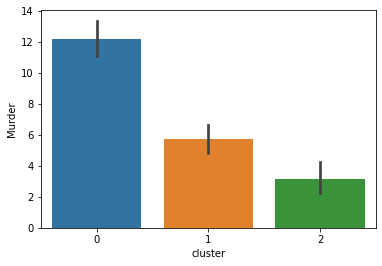

In [29]:
sns.barplot("cluster",'Murder',data=df)

# Observation :
we can see that murder crime in cities are most in cluster(0)

<AxesSubplot:xlabel='cluster', ylabel='Assault'>

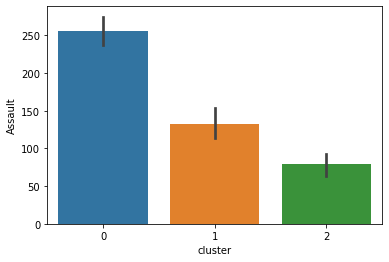

In [30]:
sns.barplot('cluster','Assault',data=df)

# Observation :
we can see that assualt crime in cities are most in cluster(0)

<AxesSubplot:xlabel='cluster', ylabel='UrbanPop'>

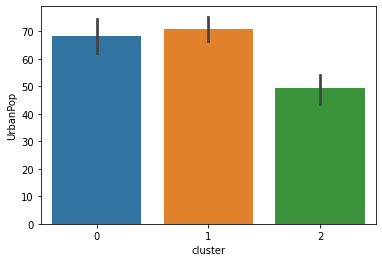

In [31]:
sns.barplot('cluster','UrbanPop',data=df)

# Observation
we can crime rate of urbanpop in cities are most in cluster(1)

<AxesSubplot:xlabel='cluster', ylabel='Rape'>

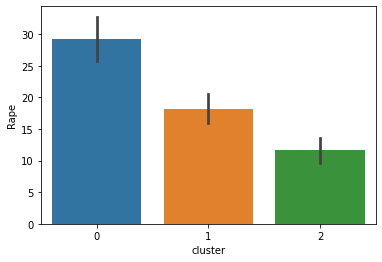

In [32]:
sns.barplot('cluster','Rape',data=df)

# Observation
We can see that the crime rate of Rape in cities are most in cluster(0)

# K Means

In [33]:
from sklearn.cluster import KMeans

In [34]:
df.drop('cluster',axis=1,inplace = True)


In [35]:
df

,Cities,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


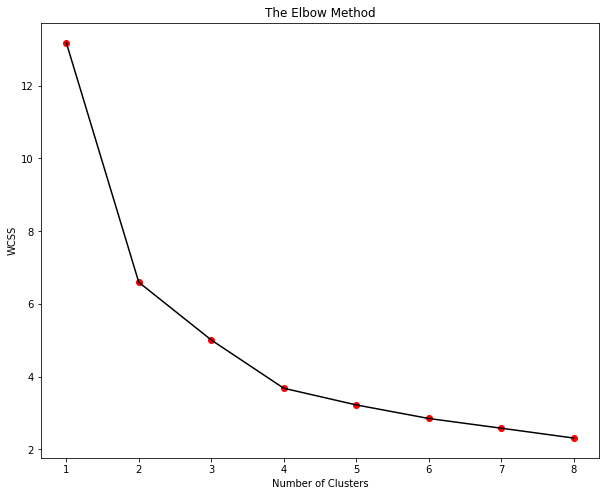

In [36]:
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 9):
    clf = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clf.fit(df2)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS

plt.plot(range(1, 9), WCSS,color = 'black')
plt.scatter(range(1,9),WCSS,color = 'red')
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

# Observaation :
from the above we can observe that max number of cluster are 4 and after 4 graph looks stagnant

In [37]:
clf = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf.fit_predict(df2)

In [38]:
y_kmeans

array([2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 3, 0, 1, 3, 1, 3, 2, 3, 0, 1, 0,
       3, 2, 1, 3, 3, 0, 3, 1, 0, 0, 2, 3, 1, 1, 1, 1, 1, 2, 3, 2, 0, 1,
       3, 1, 1, 3, 3, 1])

In [39]:
clf.cluster_centers_

array([[0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868]])

In [40]:
md = pd.Series(y_kmeans)
df['Cluster']=md

In [41]:
df.iloc[:,0:].groupby(['Cluster']).mean().apply(lambda x: tuple(x))

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,10.966667,264.000000,76.500000,33.608333
1,5.852941,141.176471,73.647059,19.335294
2,13.937500,243.625000,53.750000,21.412500
3,3.600000,78.538462,52.076923,12.176923


In [42]:
df.groupby(['Cluster'])['Cities'].apply(lambda x: tuple(x))

Cluster
0    (Alaska, Arizona, California, Colorado, Florid...
1    (Connecticut, Delaware, Hawaii, Indiana, Kansa...
2    (Alabama, Arkansas, Georgia, Louisiana, Missis...
3    (Idaho, Iowa, Kentucky, Maine, Minnesota, Mont...
Name: Cities, dtype: object

In [43]:
df.iloc[:,0:].groupby(['Cluster']).count().apply(lambda x: tuple(x))

,Cities,Murder,Assault,UrbanPop,Rape
Cluster,,,,,
0,12,12,12,12,12
1,17,17,17,17,17
2,8,8,8,8,8
3,13,13,13,13,13


# Observation:
We can see that most number of crime are in cluster(2) cities

# Validation of K Means Clustering using Silhouette Score

In [44]:
from sklearn.metrics import silhouette_score as sil
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm 
from yellowbrick.cluster import KElbowVisualizer

model


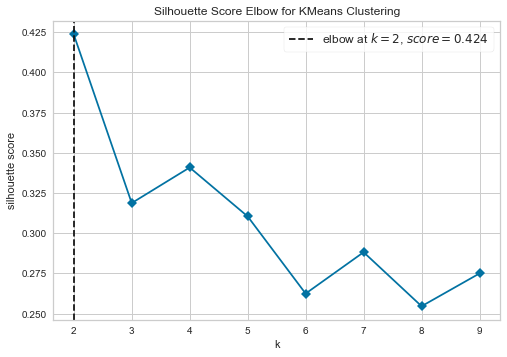

In [45]:

# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10,max_iter=500, n_init=20,)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
print('model')
visualizer1.fit(df2)    
visualizer1.poof()
plt.show()


# Observation :
In KElbowVisualizer graph we can see that max number of silhouette score at cluster(2)

For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.3187755079997931
For n_clusters = 4 The average silhouette_score is : 0.34089035600743633
For n_clusters = 5 The average silhouette_score is : 0.31047828422452595
For n_clusters = 6 The average silhouette_score is : 0.293046399889631
For n_clusters = 7 The average silhouette_score is : 0.28821826266004197
For n_clusters = 8 The average silhouette_score is : 0.2739250289741455
For n_clusters = 9 The average silhouette_score is : 0.27503190107418357


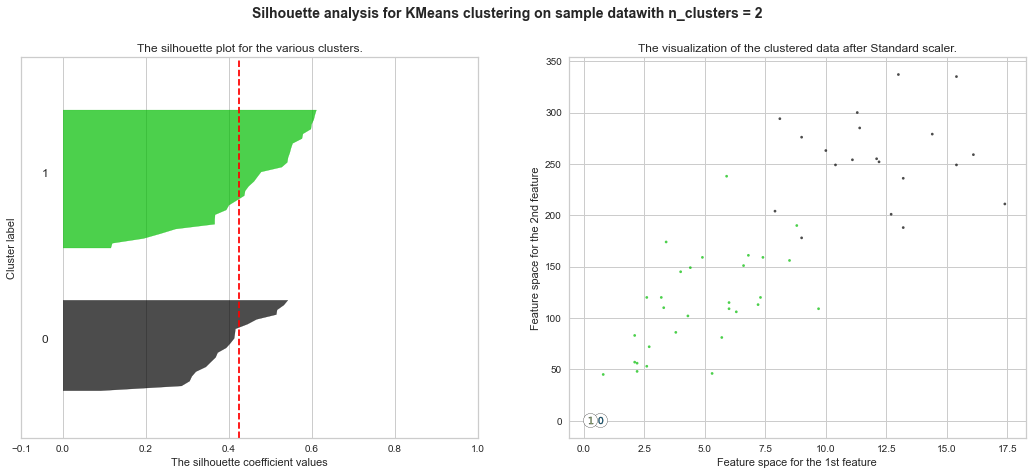

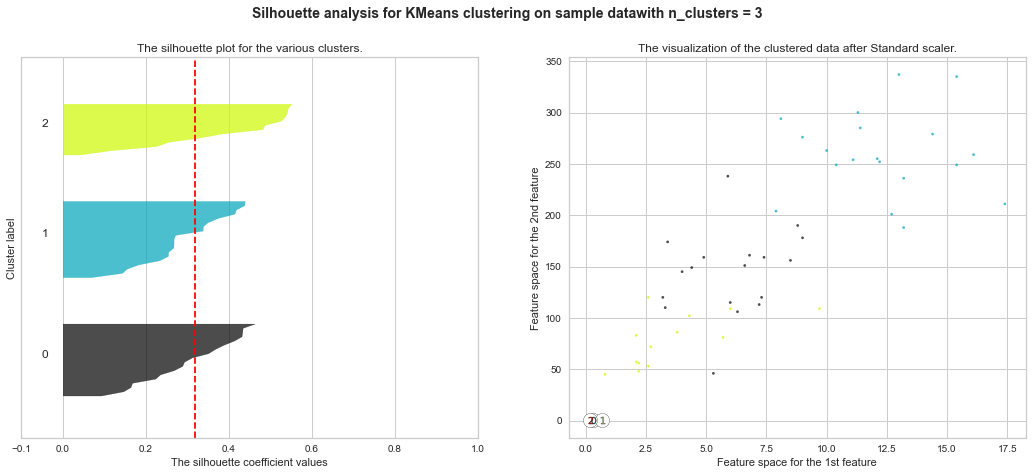

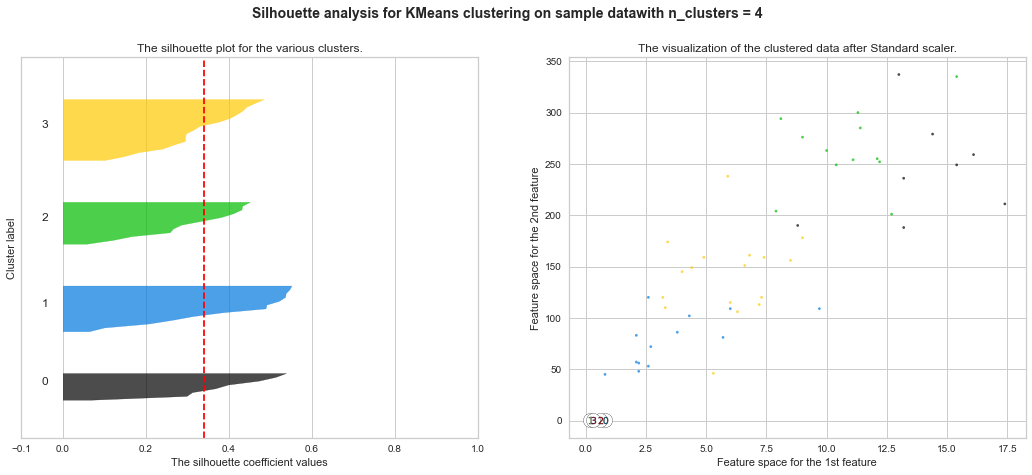

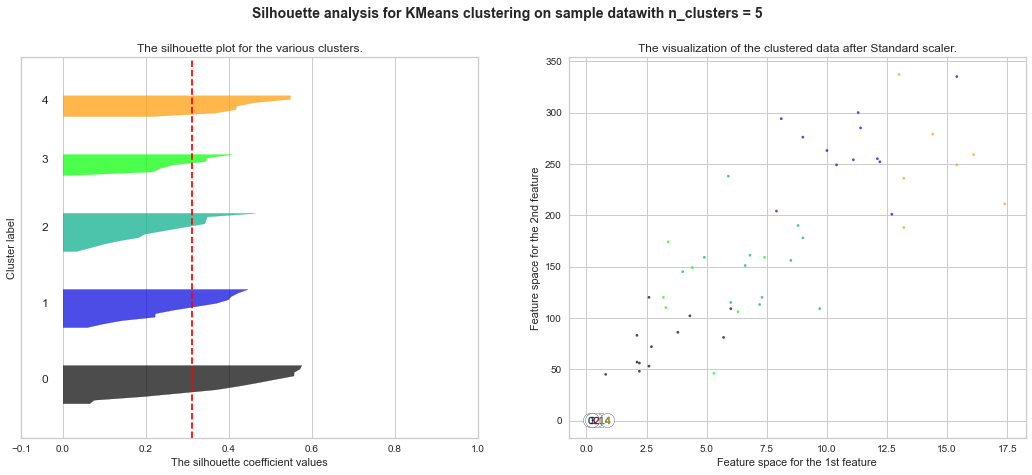

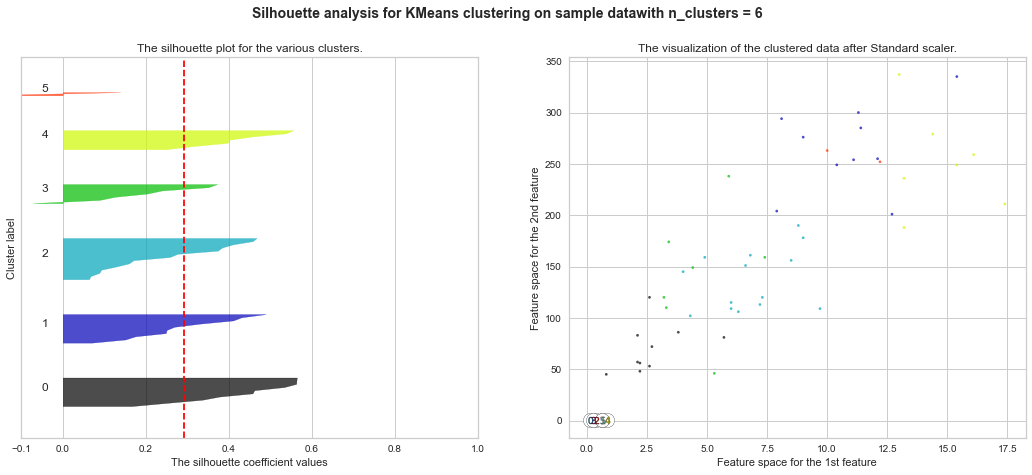

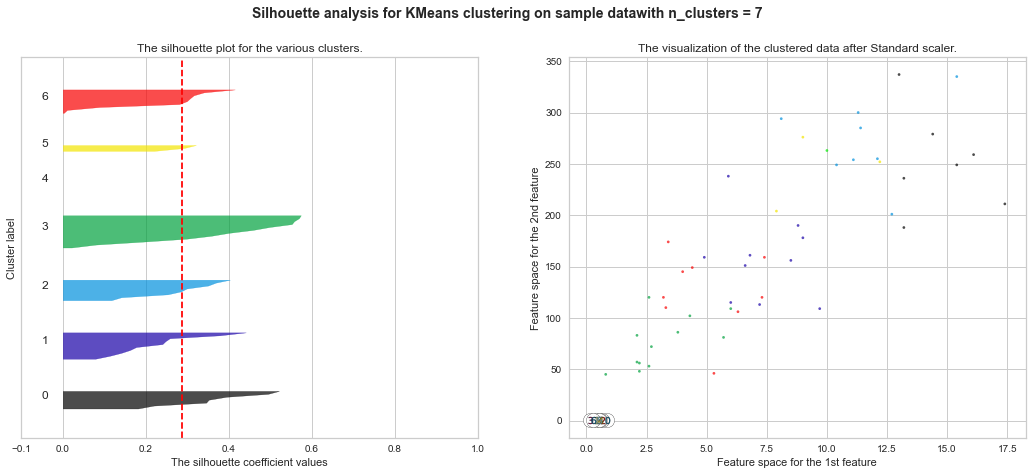

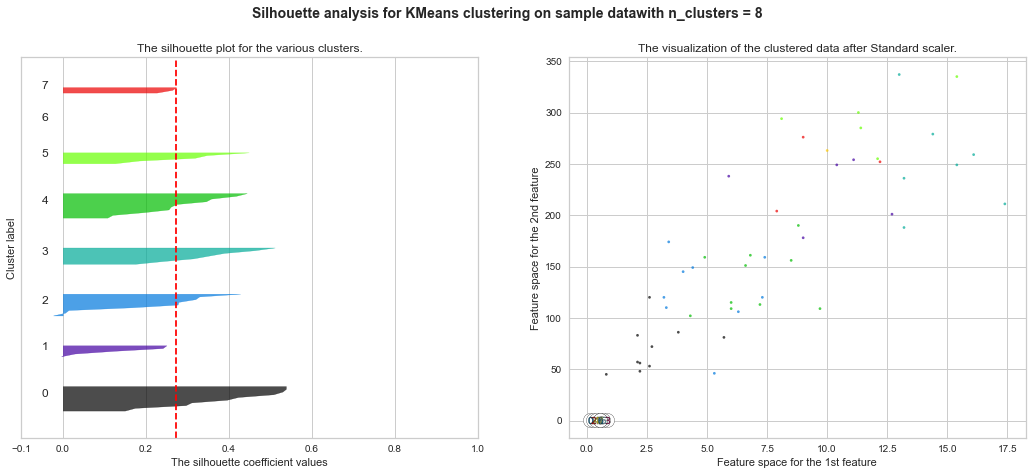

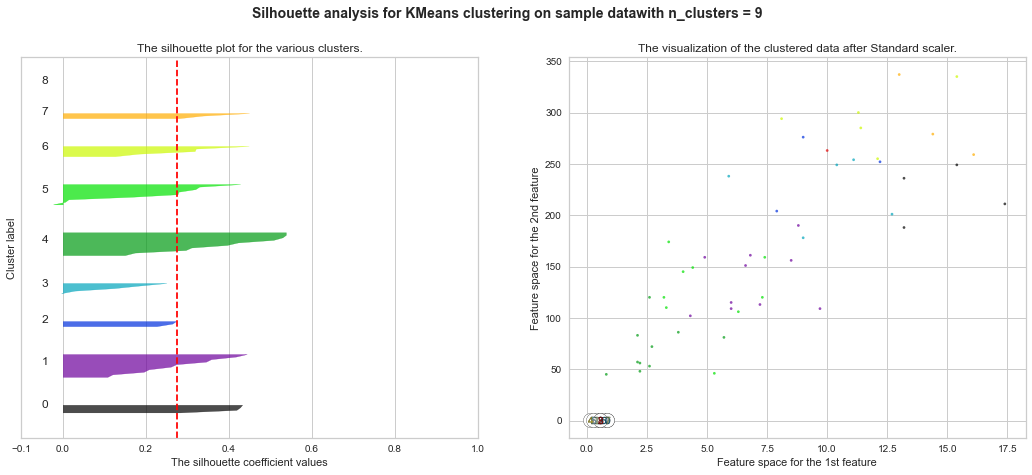

In [64]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(df2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
         # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
  # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data.iloc[:,0], data.iloc[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


In [47]:
sc_score = []
for i in range_n_clusters:
    km = KMeans(i)
    y = km.fit_predict(df2)
    sc_score.append(sil(df2,y))

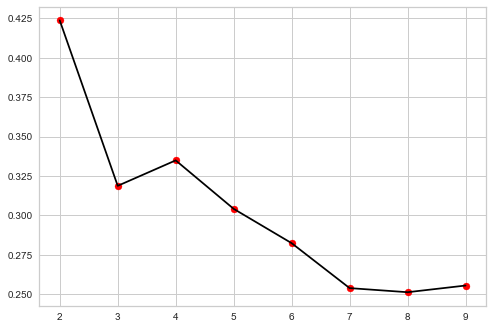

In [48]:
plt.plot(range_n_clusters,sc_score,color ='black')
plt.scatter(range_n_clusters,sc_score,color ='red')
plt.show()

# Barplot using K-Means Clustering 

<AxesSubplot:xlabel='Cluster', ylabel='Murder'>

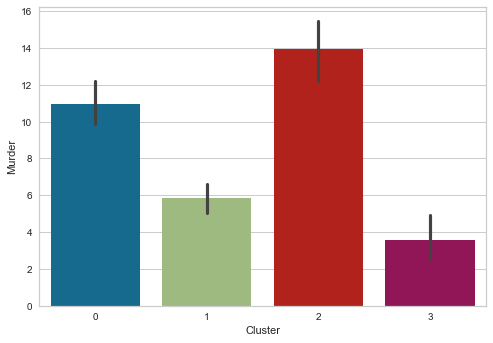

In [49]:
sns.barplot('Cluster','Murder',data=df)

# Observation:
we can that in cluster 2 cities the crime rate of murder is very high and we can see some outliers

<AxesSubplot:xlabel='Cluster', ylabel='Assault'>

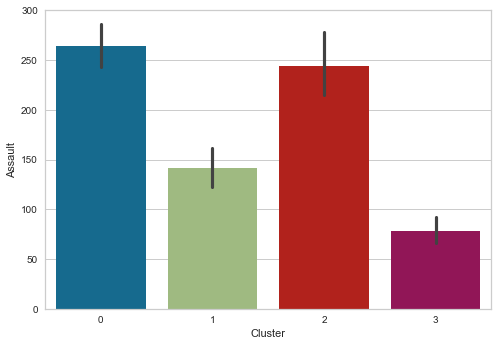

In [50]:
sns.barplot("Cluster","Assault",data=df)

# Observation:
we can see that in cluster(0) cities having high number of crime rate Assault

<AxesSubplot:xlabel='Cluster', ylabel='UrbanPop'>

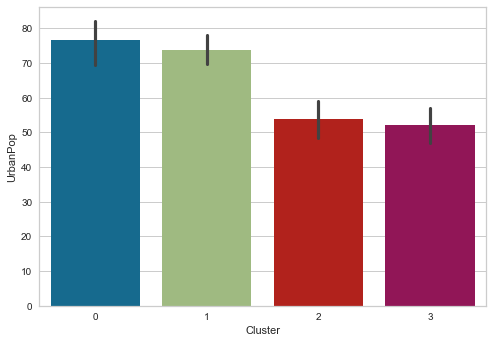

In [51]:
sns.barplot('Cluster','UrbanPop',data=df)

# Observation:
we can see that the crime rate of urbanpop is very high in cluster(0) cities

<AxesSubplot:xlabel='Cluster', ylabel='Rape'>

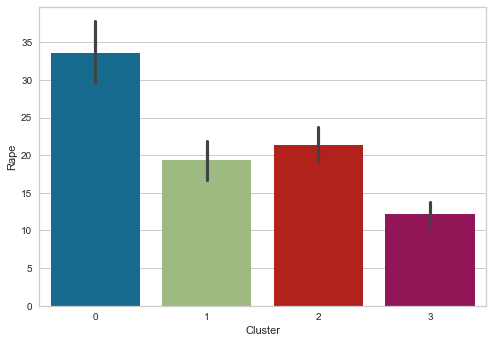

In [53]:
sns.barplot('Cluster','Rape',data=df)

# Observation:
we can see that the crime rate of rape in cluster(0) cities is very high

# DBSCAN

In [55]:
from sklearn.cluster import DBSCAN

In [56]:
df.drop('Cluster',axis=1,inplace=True)

In [57]:
df

,Cities,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [58]:
dbs = DBSCAN(min_samples = 8,eps = 4)
dbs.fit(df2)

DBSCAN(eps=4, min_samples=8)

In [59]:
dbs.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [60]:
cl = pd.DataFrame(dbs.labels_,columns=['cluster'])
clustered = pd.concat([df,cl],axis=1)

In [61]:
clustered

,Cities,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [62]:
clustered.iloc[:,0:].groupby(['cluster']).mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,7.788,170.76,65.54,21.232


In [63]:
clustered.iloc[:,0:].groupby(['cluster']).count()

,Cities,Murder,Assault,UrbanPop,Rape
cluster,,,,,
0,50,50,50,50,50
